## Logistic regression

**Logistic regression** is a Machine Learning technique to find the relationships between two variables and predict the value of one of them as a function of the other. Normally, this prediction has only two possible outcomes, such as predicting the sex of a person (female, male), the outcome of an experiment (success, failure), and so on.

Moreover, this prediction is obtained in terms of probability; that is, the probability that a given outcome will occur in a dichotomous event. This probability can then be modified to generate the prediction of a class.

This Machine Learning algorithm is usually the first to be studied for simplicity and fundamentalism. It is also very easy to implement.

### Model parameterization

All Machine Learning models have a large number of parameters, vital for their application to different use cases and data sets. The choice of these parameters will depend on the data set and the specific problem we are trying to solve. It is advisable to try different values and validations in order to always obtain the best possible model.

We can easily build a logistic regression model in Python using the `scikit-learn` library and the `LogisticRegression` function. Some of its most important parameters and the first ones we should focus on are:

- `penalty`: This parameter is used to prevent model overfitting, which is when the model learns so much from the training data that it is not able to generalize and only predicts those data well and not new ones. This parameter can be configured so that there is no penalty and to graduate it from very slight to very high levels.
- `C`: This parameter determines the complexity of the model. It is the inverse of the previous parameter. It is a decimal number that determines how simple we want the model to be. The higher the number, the more complex the model will be and the more it will fit the training sample (increasing the probability of overfitting).
- `solver`: Regression algorithm that will be used to train the model. Depending on the size of the data set, the classes to predict, the level of overfitting we are willing to assume or the level of accuracy, we will choose one implementation or another.
- `max_iter`: Maximum number of iterations.

Another very important parameter is the `random_state`, which controls the random generation seed required by some of the model solvers. This parameter is crucial to ensure replicability.

### Model usage

Each model has certain requirements regarding the content and form of the input to ensure that the results of the model are the best possible. In the case of logistic regression they are as follows:

- Identify and maintain the dependent variables. Logistic regression works well when a direct relationship between the value of a variable and the value of the class is identified. That is, if we want to classify a patient as healthy/unhealthy, a variable that would decant his status would be sick/not sick, for example. These types of variables should be maintained.
- Perform a correct EDA. It is vital to apply this process to eliminate noise, duplicates and normalize the characteristics. This model only works with numerical variables.
- Stratified sample size. This model performs best when it has (approximately) the same number of records from one class and another. In addition, it must have a sufficient sample to train, with as many different casuistries as possible in order to generalize and maximize its learning.

#### Application to the Titanic dataset

In the Titanic data set we have more than one characteristic, and with logistic regression we predict whether they will survive or not. If the value predicted by the model were 0.85, that would mean that the person has an 85% chance of surviving and a 15% chance of not surviving. Thus, we must establish a limit (*threshold*) to be able to perform the classification (we answer the following question: from what probability value can we assume that the person survives or not?). Let us assume that this value is 50%, i.e. when the probability is greater than or equal to 0.5, the value is 1 (he/she survives), and when the probability is less than 0.5, the value is 0 (he/she does not survive).

In addition, we also need to know that the process of training and using the model comes after the exploratory analysis (EDA), so we will need to start from it.

##### Step 1: Reading the processed dataset

In [1]:
import pandas as pd

train_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/clean_titanic_train.csv")
test_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/clean_titanic_test.csv")

train_data.head()

,Pclass,Fare,Sex_n,Embarked_n,FamMembers,Survived
0,2.0,10.500,1.0,0.0,0.0,0
1,2.0,26.000,0.0,0.0,1.0,1
2,3.0,7.750,1.0,2.0,0.0,1
3,3.0,16.700,1.0,0.0,2.0,1
4,3.0,34.375,1.0,0.0,4.0,0


We will use the `train` set to train the model, while with the `test` we will evaluate it to measure its degree of effectiveness. We will also split the predictors of the features.

In [2]:
X_train = train_data.drop(["Survived"], axis = 1)
y_train = train_data["Survived"]
X_test = test_data.drop(["Survived"], axis = 1)
y_test = test_data["Survived"]

##### Step 2: Initialization and training of the model

In [3]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

The training time of a model will depend, first of all, on the size of the dataset (instances and features), and also on the model type and its configuration.

##### Step 3: Model prediction

Once the model has been trained, it can be used to predict with the test data set.

In [4]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1])

With raw data it is very difficult to know whether the model is getting it right or not. To do this, we must compare it with reality. There are a large number of metrics to measure the effectiveness of a model in predicting, including **accuracy**, which is the fraction of predictions that the model made correctly.

In [5]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.851145038167939

The above value would be interpreted as the model having predicted, out of 262 passengers, the survival outcome of 222 of them (whether they survived or not) correctly.

In addition to the observed model score, it is common in classification problems to construct a **confusion matrix**, which is a table that is organized such that each row of the matrix represents instances of a predicted class, while each column represents instances of an actual class:

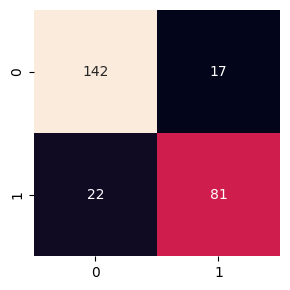

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

titanic_cm = confusion_matrix(y_test, y_pred)

# Let's draw this matrix to make it more visual
cm_df = pd.DataFrame(titanic_cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

The interpretation of a confusion matrix is as follows:

- **True positive** (*TP*): corresponds to the number `142` and are the cases where the model predicted positive (no survival) and the actual class is also positive.
- **True negative** (*TN*): Corresponds to the number `80` and are the cases where the model predicted negative (survival) and the actual class is also negative.
- **False positive** (*FP*): Corresponds to the number `23` and are the cases in which the model predicted positive and the actual class is negative.
- **False negative** (*FN*): Corresponds to the number `17` and are the cases where the model predicted negative and the actual class is positive.

These four measures are often used to calculate more complex metrics.

##### Step 4: Optimization of results

As we have seen, the base model (with all predefined parameters) of the logistic regression obtains just over 84% accuracy. However, modifying the model parameters could lead to a significant improvement (or worsening) of the results. There are several strategies such as regularized models.